In [119]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Experiment 3: Focus

### Part 1: Parallax

#### Observation

I see an F. Using parallax. When the lens is close, F is moving a lot. As the lens gets closer to the F and farther from me, the F moves a lot less.
When the lens is halfway between the lens and F, the F gets really big. It gets small when it leaves the midpoint.

WRITE F PRECISION TEST HERE

### Part 2: Measurements

#### Virtual image

We measure with a phone camera the transit time of "F".





In [120]:
f_to_lens = 35 # cm
lens_to_camera = 11 # cm
camera_movement = 4.5 # cm
image_movement = 2.4 # cm

r = camera_movement/image_movement

lens_error = 0.1 # cm
camera_error = 0.5 # cm

In [121]:
virtual_f = lens_to_camera * image_movement/(camera_movement - image_movement)
virtual_error = np.sqrt(np.sum(np.array([
    camera_error/(r - 1),
    (lens_to_camera * camera_error)/image_movement/(r-1)**2,
    (lens_to_camera * lens_error)/image_movement/(r-1)**2,
])**2))
virtual_f, virtual_error

(12.57142857142857, 3.105499921228117)

#### Real image


In [122]:
focus_error = 1 # cm; we moved the lens until it was blurry
width_error = 0.1 # cm; precision of rulers

f_height = 1.5 # cm
f_top_width = 0.5  # cm
f_mid_width = 0.45  # cm
f_line_width = 0.09  # cm

light_to_f = 6.1  # cm

f_to_lens = np.array([ 25.2, 26.9, 34.5, 44.8, 38.7, 29.1 ])  # cm
lens_to_image = np.array([ 35.2, 34.6, 27.6, 23.4, 25.3, 32.3 ])  # cm
bench_error = 0.5 # cm, error in bench markings

image_height = np.array([2.2, 1.6, 1, 0.7, 0.8, 1.4])  # cm
image_line_width = np.array([0.15, 0.1, 0.1, 0.05, 0.05, 0.1])  # cm
image_top_width = np.array([1.3, 1.1, 0.6, 0.4, 0.4, 0.75])  # cm
image_mid_width = np.array([0.8, 0.75, 0.5, .3, .3, 0.5])  # cm
height_error = 0.1 # cm, error in height measurements

In [123]:
x1 = f_to_lens
x2 = lens_to_image
dx1 = focus_error
dx2 = focus_error

model = (
    lambda x1, f: 
    1/(1/f - 1/x1)
)
[f], cov = sp.optimize.curve_fit(
    model, 
    x1, 
    x2
)
f, cov
df = np.sqrt(cov[0,0])
f_res = x2 - model(x1, f)
f_chi2 = np.sum(f_res**2/(dx1**2 + dx2**2))
f_rchi2 = f_chi2 / ( len(x1) - 1)
f, df, f_chi2, f_rchi2

(15.050542978016818, 0.12308086546622393, 3.98348027540763, 0.7966960550815261)

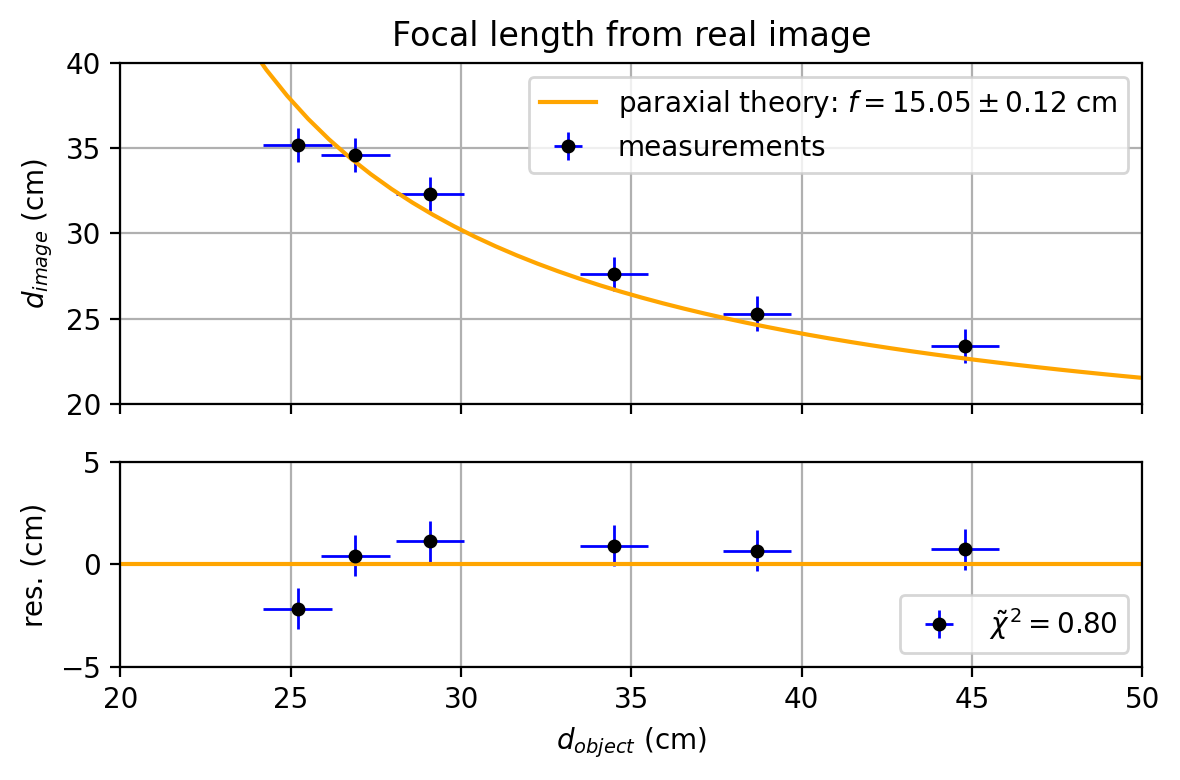

In [129]:
fig, (ax_main, ax_res) = plt.subplots(
        2, 1, sharex=True, 
    figsize=(6, 4), dpi=200, 
    gridspec_kw={'height_ratios': [5, 3]}
)

plt.sca(ax_main)
plt.title("Focal length from real image")

# plt.scatter(lens_to_image/f_to_lens, image_height/f_height, color="black")

plt.errorbar(
    x1, x2, yerr = dx2, xerr = dx1,
    ecolor="blue", c="black",
    label='measurements',
    linewidth = 0, elinewidth = 1, markersize = 8, marker='.'
)
interval = np.linspace(20, 50)
plt.xlim(20, 50)
plt.plot(interval, model(interval, f), label=f"paraxial theory: $f = {f:.2f}\pm{df:.2f}$ cm", color="orange")
plt.grid()
plt.ylabel("$d_{image}$ (cm)")
# plt.xlim(0, 1.8)
plt.ylim(20, 40)
plt.legend()


plt.sca(ax_res)
plt.errorbar(
    x1, f_res, yerr = dx2, xerr= dx1,
    ecolor="blue", c="black",
    label=f'$\\tilde\chi^2 = {f_rchi2:.2f}$',
    linewidth = 0, elinewidth = 1, markersize = 8, marker='.'
)
plt.axhline(0, color='orange')

plt.xlabel("$d_{object}$ (cm)")

plt.ylabel("res. (cm)")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(-5, 5)
plt.tight_layout()
plt.savefig('exp3_1.png')

In [131]:
m = image_height/f_height # magnification
a = lens_to_image/f_to_lens # distance ratio

dm = m * np.sqrt((height_error/image_height)**2 + (height_error/f_height)**2) # error in magnification
da = a * np.sqrt((bench_error/lens_to_image)**2 + (bench_error/f_to_lens)**2) # error in distance ratio

res = m - a
chi2 = np.sum(res**2 / ( dm**2 + da**2 ))
rchi2 = chi2 / ( len(m) - 1)

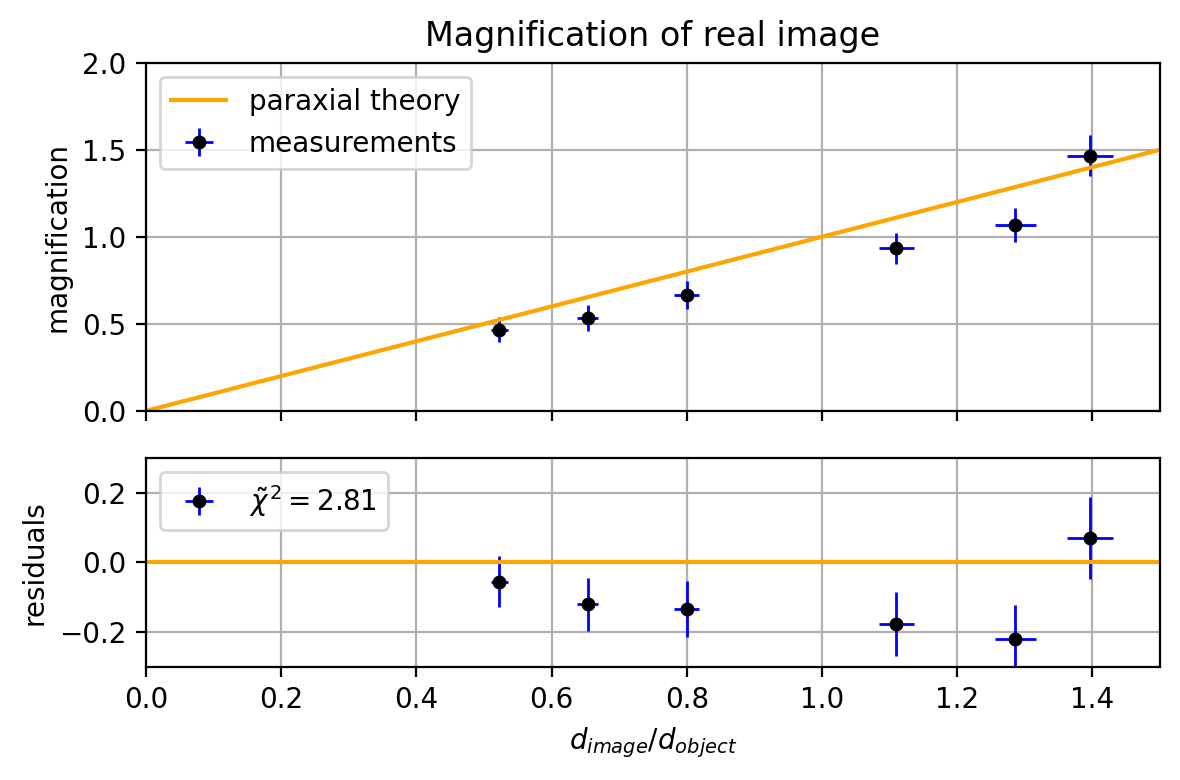

In [134]:
fig, (ax_main, ax_res) = plt.subplots(
        2, 1, sharex=True, 
    figsize=(6, 4), dpi=200, 
    gridspec_kw={'height_ratios': [5, 3]}
)

plt.sca(ax_main)
plt.title("Magnification of real image")

# plt.scatter(lens_to_image/f_to_lens, image_height/f_height, color="black")

plt.errorbar(
    a, m, yerr = dm, xerr = da,
    ecolor="blue", c="black",
    label='measurements',
    linewidth = 0, elinewidth = 1, markersize = 8, marker='.'
)
plt.plot([0,2],[0,2], label="paraxial theory", color="orange")
plt.grid()
plt.xlim(0, 1.5)
plt.ylim(0, 2)
plt.ylabel("magnification")
plt.legend(loc='upper left')


plt.sca(ax_res)
plt.errorbar(
    a, res, yerr = dm, xerr=da,
    ecolor="blue", c="black",
    label=f'$\\tilde\chi^2 = {rchi2:.2f}$',
    linewidth = 0, elinewidth = 1, markersize = 8, marker='.'
)
plt.axhline(0, color='orange')


plt.xlabel("$d_{image}/d_{object}$")
plt.ylabel("residuals")
plt.legend(loc='upper left')
plt.grid()
plt.ylim(-0.3, 0.3)
plt.tight_layout()
plt.savefig('exp3_0.png')